# Ramsey-Cass-Koopmans (RCK) model

The RCK model is an extension of the Solow-Swan model, pioneered by [Ramsey (1928)](http://www.jstor.org/stable/2224098) and extended by [Cass (1965)](http://www.jstor.org/stable/2295827) and [Koopmans (1965)](http://cowles.yale.edu/sites/default/files/files/pub/d01/d0163.pdf). Known also as the Neoclassical Growth Model, it is a "workhorse" of modern macroeconomics and forms the basis of the majority of modern works in economic growth and business cycles literature.

In the Ramsey model there is a finite number of agents with an infinite time horizon. This can be justified by the following argument. In the real world we see that at least some individuals leave sizeable bequests and support their children financially throughout their lives. This implies that parents care for their children's "utility". 

In the RCK model it is assumed that parents care about their children as much as they care about themselves. Therefore, each household is in fact a "dynasty" of individuals with an infinite planning horizon, and the welfare function of a household is constructed as follows:

\begin{align}
U = \sum_{t=0}^{\infty}\beta^{t}u\left(c_{t}\right)
\end{align}

where $\beta$ is a discount factor and $u\left(\cdot\right)$ is an instantaneous utility function (felicity function).

Usually the instantaneous utility function is represented by a Constant Relative Risk Aversion (CRRA) function:

\begin{align}
u\left(c_{t}\right) = \frac{c_{t}^{1-\sigma}-1}{1-\sigma}
\end{align}

where $\sigma>0$ regulates the degree of risk aversion. The higher the $\sigma$, the more risk averse is the household which implies that household prefers smoother and stabler consumption path over time.

We will first consider a RCK model with simplifying assumptions that yield an analytical solution, and then consider a general case.

In [57]:
# Make graphs appear within the notebook
%matplotlib inline

# Import numerical computations library
import numpy as np

# Import plotting library
import matplotlib.pyplot as plt

# Import minimization function
from scipy.optimize import minimize

# Import optimization function
import scipy.optimize as opt

# Import functions from AppliedMacroPlots.py
from AppliedMacroPlots import *

## Simplified model

### Households' problem

Let us now make the simplifying assumptions. There is no population and technology growth, and without loss of generality we can normalize $A=1$, so that capital per effective labor and capital per worker are equivalent. We will also assume total depreciation of capital ($\delta=1$) and that the instantaneous utility function is logarithmic ($\sigma=1$).

The representative "dynasty" solves the following problem:

\begin{align}
\max_{c_{t},a_{t+1}}\quad & U=\sum_{t=0}^{\infty}\beta^{t}\log c_{t}\\
\text{subject to}\quad & c_{t}+a_{t+1}=w_{t}+\left(1+r_{t}\right)a_{t}
\end{align}

Write down the Lagrangian:

\begin{align}
\mathcal{L}=\sum_{t=0}^{\infty}\beta^{t}\log c_{t}+\sum_{t=0}^{\infty}\lambda_{t}\left[w_{t}+\left(1+r_{t}\right)a_{t}-c_{t}-a_{t+1}\right]
\end{align}

Note that we have an infinity of time periods and Lagrange multipliers. Rewrite the Lagrangian so that it is easier to take derivatives:

\begin{align}
\mathcal{L} & =\ldots+\beta^{t}\log c_{t}+\ldots\\
 & \quad+\ldots+\lambda_{t}\left[w_{t}+\left(1+r_{t}\right)a_{t}-c_{t}-a_{t+1}\right]\\
 & \quad+\lambda_{t+1}\left[w_{t+1}+\left(1+r_{t+1}\right)a_{t+1}-c_{t+1}-a_{t+2}\right]+\ldots
\end{align}

In each period $t$ we can choose period $t$ consumption $c_{t}$ and end-of-period $t$ assets $a_{t+1}$.

First order conditions (FOCs):

\begin{align}
\frac{\partial\mathcal{L}}{\partial c_{t}} & =\beta^{t}\frac{1}{c_{t}}+\lambda_{t}\left[-1\right]=0\\
\frac{\partial\mathcal{L}}{\partial a_{t+1}} & =\lambda_{t}\left[-1\right]+\lambda_{t+1}\left[\left(1+r_{t+1}\right)\right]=0
\end{align}

Simplify and rewrite:

\begin{align}
\lambda_{t} & =\beta^{t}\frac{1}{c_{t}}\\
\lambda_{t} & =\left(1+r_{t+1}\right)\lambda_{t+1}
\end{align}

Join conditions:

\begin{align}
\beta^{t}\frac{1}{c_{t}} & =\left(1+r_{t+1}\right)\beta^{t+1}\frac{1}{c_{t+1}}\\
\frac{1}{c_{t}} & =\left(1+r_{t+1}\right)\beta\frac{1}{c_{t+1}}\\
c_{t+1} & =\beta\left(1+r_{t+1}\right)c_{t}
\end{align}

We have obtained the standard Euler equation.

The optimal behavior of the households can then be restated as:

\begin{align}
c_{t+1} & =\beta\left(1+r_{t+1}\right)c_{t}\\
c_{t}+a_{t+1} & =w_{t}+\left(1+r_{t}\right)a_{t}
\end{align}

And after some algebra the optimal consumpion in period $t$ can be expressed as:

\begin{align}
c_{t}=\frac{1}{1-\beta}\left[\left(1+r_{t}\right)a_{t}+\sum_{i=0}^{\infty}\frac{w_{t+i}}{1+\bar{r}_{t+i}}\right]
\end{align}

where:

\begin{align}
1+\bar{r}_{t+i}=\begin{cases}
1 & \text{for }i=0\\
\left(1+r_{t+1}\right)\cdot\ldots\cdot\left(1+r_{t+i}\right) & \text{for }i=1,2,\ldots
\end{cases}
\end{align}

As you can see, the optimal behavior of households requires them to formulate accurate forecasts of prices $w$ and $r$.

### Firms' problem

The problem of the firms will be the same for both simplified and general cases. The firms want to hire optimal quantities of labor and capital to maximize their profits:

\begin{align}
\max\quad\Pi_{t}=K_{t}^{\alpha}\left(A_{t}L_{t}\right)^{1-\alpha}-w_{t}L_{t}-r_{t}^{k}K_{t}
\end{align}

First order conditions (FOCs):

\begin{align}
\frac{\partial\Pi_{t}}{\partial L_{t}} & =\left(1-\alpha\right)K_{t}^{\alpha}A_{t}^{1-\alpha}L_{t}^{-\alpha}-w_{t}=0\\
\frac{\partial\Pi_{t}}{\partial K_{t}} & =\alpha K_{t}^{\alpha-1}\left(A_{t}L_{t}\right)^{1-\alpha}-r_{t}^{k}=0
\end{align}

Simplify the above expressions:

\begin{align}
w_{t} & =\left(1-\alpha\right)A_{t}\left(\frac{K_{t}}{A_{t}L_{t}}\right)^{\alpha}\\
r_{t}^{k} & =\alpha\left(\frac{K_{t}}{A_{t}L_{t}}\right)^{\alpha-1}
\end{align}

The above equations determine both the wage $w$ and the capital rental rate $r^{k}$ as functions of capital (per labor). The real interest rate is equal to the capital rental rate, less the capital depreciation rate:

\begin{align}
r_{t} & =r_{t}^{k}-\delta
\end{align}

### General Equilibrium

The above solution of the households' problem is still relatively general, as we haven't made full use of our simplifying assumptions yet. Consider now the general equilibrium, where all markets clear. 

Since there is no government and no international trade, domestic capital is the only asset which can be in positive net supply:

\begin{align}
a_{t} = k_{t} \quad \text{for all } t
\end{align}

And the budget constraint of the households can be rewritten as:

\begin{align}
c_{t}+a_{t+1} & =w_{t}+\left(1+r_{t}\right)a_{t} \\
c_{t}+k_{t+1}&=w_{t}+\left(1+r_{t}\right)k_{t}
\end{align}

We can also use the expressions for prices (recall that $A=1$ and $\delta=1$):

\begin{align}
w_{t} & =\left(1-\alpha\right)A_{t}\left(\frac{K_{t}}{A_{t}L_{t}}\right)^{\alpha}=\left(1-\alpha\right)k_{t}^{\alpha}\\
r_{t}^{k} & =\alpha\left(\frac{K_{t}}{A_{t}L_{t}}\right)^{\alpha-1}=\alpha k_{t}^{\alpha-1}\\
r_{t} & =r_{t}^{k}-\delta=\alpha k_{t}^{\alpha-1}-1
\end{align}

And plug them into the budget constraint:

\begin{align}
c_{t}+k_{t+1} & =\left(1-\alpha\right)k_{t}^{\alpha}+\left(1+\alpha k_{t}^{\alpha-1}-1\right)k_{t}\\
c_{t}+k_{t+1} & =\left(1-\alpha\right)k_{t}^{\alpha}+\alpha k_{t}^{\alpha}\\
c_{t}+k_{t+1} & =k_{t}^{\alpha}
\end{align}

### Solution

Finally, let us guess-and-verify that this economy behaves as a Solow-Swan economy, and the households save a constant fraction $s$ of their income:

\begin{align}
k_{t+1} & =sy_{t}=s\cdot k_{t}^{\alpha}\\
c_{t} & =\left(1-s\right)y_{t}=\left(1-s\right)\cdot k_{t}^{\alpha}
\end{align}

Use the Euler equation:

\begin{align}
c_{t+1} & =\beta\left(1+r_{t+1}\right)c_{t}\\
c_{t+1} & =\beta\alpha k_{t+1}^{\alpha-1}c_{t}\\
\left(1-s\right)\cdot k_{t+1}^{\alpha} & =\beta\alpha k_{t+1}^{\alpha-1}\left(1-s\right)\cdot k_{t}^{\alpha}\\
k_{t+1} & =\beta\alpha\cdot k_{t}^{\alpha}
\end{align}

Indeed, the saving rate is a constant:

\begin{align}
s=\alpha\beta
\end{align}

Note that $\partial s / \partial \beta > 0$ and that $s \leq \alpha = s_{GR}$, with equality when $\beta=1$ (households care just as much about the future and the present). This implies that the RCK economy is never dynamically inefficient.

Under our assumptions, we can obtain an analytical, closed form solution (no need to forecast prices!) of the RCK model:

\begin{align}
c_{t} & =\left(1-\alpha\beta\right)\cdot k_{t}^{\alpha}\\
k_{t+1} & =\alpha\beta\cdot k_{t}^{\alpha}
\end{align}

Finally, let us find the steady state of the model:

\begin{align}
k^{*} & =\alpha\beta\left(k^{*}\right)^{\alpha}\\
\left(k^{*}\right)^{1-\alpha} & =\alpha\beta\\
k^{*} & =\left(\alpha\beta\right)^{1/\left(1-\alpha\right)}\\
c^{*} & =\left(1-\alpha\beta\right)\cdot \left(\alpha\beta\right)^{\alpha/\left(1-\alpha\right)}
\end{align}

The first plot below illustrates the process of convergence to the steady state over time. Note that since $\delta=1$, the convergence is very fast.

The second plot is a new type of plot, called a phase diagram, and will illustrate the convergence to the steady state in the $(k, c)$ space.

In [2]:
# Parameters
α = 0.33
β = 0.96
δ = 1

# Steady state
k_star = (α*β)**(1/(1-α))
c_star = (1-α*β) * k_star**α

# Number of periods
T = 10+1

k_t = np.zeros(T)
c_t = np.zeros(T)

# Initial level of capital per worker
k_0 = k_star/20

# Solving the model forward
k_t[0] = k_0
c_t[0] = (1-α*β) * k_0**α

for t in range(T-1):
    k_t[t+1] = α*β * k_t[t]**α
    c_t[t+1] = (1-α*β) * k_t[t+1]**α

# Store results for future use
k_simple, c_simple = k_t, c_t

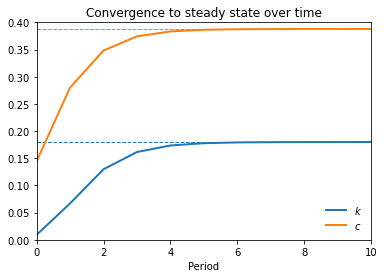

In [3]:
# Convergence plot
plt.plot(k_t, lw=2, label='$k$')
plt.plot(c_t, lw=2, label='$c$')

plt.hlines(k_star, 0, T-1, color='C0', lw=1, linestyle='--')
plt.hlines(c_star, 0, T-1, color='C1', lw=1, linestyle='--')

plt.title('Convergence to steady state over time')
plt.xlabel('Period')
plt.legend(loc='lower right')

plt.savefig('img/RCK_trans.pdf', transparent=True) #, bbox_inches='tight', pad_inches=0.05)

plt.show()

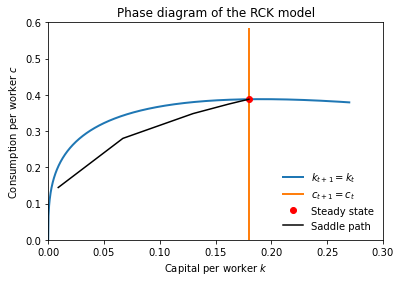

In [4]:
# Phase diagram

kk = np.linspace(0, 1.5*k_star, 1000)
cc = np.linspace(0, 1.5*c_star, 1000)

plt.plot(kk, kk**α - kk, lw=2, label='$k_{t+1}=k_{t}$')
plt.plot(kk**0 * k_star, cc, lw=2, label='$c_{t+1}=c_{t}$')
plt.plot(k_star, c_star, 'ro', label='Steady state')
plt.plot(k_t, c_t, 'k-', label='Saddle path')

plt.title('Phase diagram of the RCK model')
plt.xlabel('Capital per worker $k$')
plt.ylabel('Consumption per worker $c$')
plt.legend(loc='lower right')

plt.show()

The phase diagram shows a number of conditions. 

The first one, $k_{t+1}=k_{t}$, describes a set of combinations of $k$ and $c$ for which capital per worker does not change over time. We can find them via the budget/resource constraint:

\begin{align}
c_{t}+k_{t+1} & =k_{t}^{\alpha}\\
c_{t} &= k_{t}^{\alpha} - k_{t+1}
\end{align}

If $k_{t+1}=k_{t}=k$:

\begin{align}
c = k^{\alpha} - k
\end{align}

The second condition, $c_{t+1}=c_{t}$, describes a set of combinations of $k$ and $c$ for which consumption per worker does not change over time. We can find them via the Euler equation:

\begin{align}
c_{t+1} & =\beta\left(1+r_{t+1}\right)c_{t}\\
1 &= \beta\left(1+r_{t+1}\right)\\
r_{t+1} &= \frac{1}{\beta} - 1\\
\alpha k_{t+1}^{\alpha-1}-1  &= \frac{1}{\beta} - 1 \\
k_{t+1}^{\alpha-1} &= \frac{1}{\alpha\beta}\\
k_{t+1} &= \left(\alpha\beta\right)^{1/\left(1-\alpha\right)} = k^{*}\\
\end{align}

That means that when the capital per worker is at its steady state level, $c_{t+1}=c_{t}$ for all $c$.

Obviously, the intersection of $k_{t+1}=k_{t}$ and $c_{t+1}=c_{t}$ is by definition the steady state of the model. 

Finally, the "saddle path" is our model's solution. Importantly, there is only one path that leads from any possible level of capital per worker $k$ to the steady state. This guarantees that the model has a unique solution.

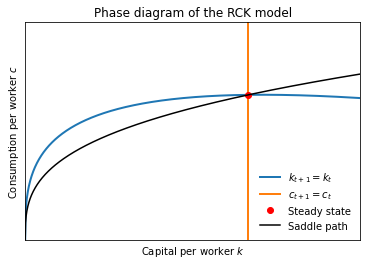

In [5]:
# Phase diagram

kk = np.linspace(0, 1.5*k_star, 1000)
cc = np.linspace(0, 1.5*c_star, 1000)

plt.plot(kk, kk**α - δ*kk, lw=2, label='$k_{t+1}=k_{t}$')
plt.plot(kk**0 * k_star, cc, lw=2, label='$c_{t+1}=c_{t}$')
plt.plot(k_star, c_star, 'ro', label='Steady state')
plt.plot(kk, (1-α*β)*kk**α, 'k-', label='Saddle path')

plt.title('Phase diagram of the RCK model')
plt.xlabel('Capital per worker $k$')
plt.ylabel('Consumption per worker $c$')
plt.legend(loc='lower right')

plt.xticks([])
plt.yticks([])

plt.savefig('img/RCK_simple.pdf', transparent=True) #, bbox_inches='tight', pad_inches=0.05)

plt.show()

## Neoclassical Growth Model

We now turn to analyzing the full RCK/NGM model. Population grows at rate $n$, while technology improves at rate $g$. The firms' problem is the same as before. What is a bit different is the households' problem.

### Households' problem

The representative "dynasty" solves the following problem:

\begin{align}
\max\quad & U=\sum_{t=0}^{\infty}\beta^{t}\cdot\frac{c_{t}^{1-\sigma}-1}{1-\sigma}\\
\text{subject to}\quad & c_{t}+\left(1+n\right)a_{t+1}=w_{t}+\left(1+r_{t}\right)a_{t}
\end{align}

Lagrangian:

\begin{align}
\mathcal{L}=\sum_{t=0}^{\infty}\beta^{t}\cdot\frac{c_{t}^{1-\sigma}-1}{1-\sigma}+\sum_{t=0}^{\infty}\lambda_{t}\left[w_{t}+\left(1+r_{t}\right)a_{t}-c_{t}-\left(1+n\right)a_{t+1}\right]
\end{align}

Expand the Lagrangian:

\begin{align}
\mathcal{L} & =\ldots+\beta^{t}\cdot\frac{c_{t}^{1-\sigma}-1}{1-\sigma}+\ldots\\
 & \quad+\ldots+\lambda_{t}\left[w_{t}+\left(1+r_{t}\right)a_{t}-c_{t}-\left(1+n\right)a_{t+1}\right]\\
 & \quad+\lambda_{t+1}\left[w_{t+1}+\left(1+r_{t+1}\right)a_{t+1}-c_{t+1}-\left(1+n\right)a_{t+2}\right]+\ldots
\end{align}

First order conditions (FOCs):

\begin{align}
\frac{\partial\mathcal{L}}{\partial c_{t}} & =\beta^{t}c_{t}^{-\sigma}+\lambda_{t}\left[-1\right]=0\\
\frac{\partial\mathcal{L}}{\partial a_{t+1}} & =\lambda_{t}\left[-\left(1+n\right)\right]+\lambda_{t+1}\left[\left(1+r_{t+1}\right)\right]=0
\end{align}

Simplify and rewrite:

\begin{align}
\lambda_{t} & =\beta^{t}c_{t}^{-\sigma}\\
\left(1+n\right)\lambda_{t} & =\left(1+r_{t+1}\right)\lambda_{t+1}
\end{align}

Join conditions:

\begin{align}
\left(1+n\right)\beta^{t}c_{t}^{-\sigma} & =\left(1+r_{t+1}\right)\beta^{t+1}c_{t+1}^{-\sigma}\\
c_{t}^{-\sigma} & =\frac{1+r_{t+1}}{1+n}\beta c_{t+1}^{-\sigma}\\
\left(\frac{c_{t+1}}{c_{t}}\right)^{\sigma} & =\beta\frac{1+r_{t+1}}{1+n}\\
\frac{c_{t+1}}{c_{t}} & =\left(\beta\frac{1+r_{t+1}}{1+n}\right)^{1/\sigma}\\
c_{t+1} & =\left(\beta\frac{1+r_{t+1}}{1+n}\right)^{1/\sigma}c_{t}
\end{align}

We have obtained the Euler equation. Note that if $n=0$ and $\sigma=1$, we go back to our usual form of Euler equation.

### General Equilibrium

Again, since there is no government and no international trade, domestic capital is the only asset which can be in positive net supply:

\begin{align}
a_{t} = k_{t} \quad \text{for all } t
\end{align}

And the budget constraint of the households can be rewritten as:

\begin{align}
c_{t}+\left(1+n\right)a_{t+1} & =w_{t}+\left(1+r_{t}\right)a_{t} \\
c_{t}+\left(1+n\right)k_{t+1}&=w_{t}+\left(1+r_{t}\right)k_{t}
\end{align}

We can also use the expressions for prices (but this time technology improves over time, so we make use of per effective labor variables):

\begin{align}
w_{t} & =\left(1-\alpha\right)A_{t}\left(\frac{K_{t}}{A_{t}L_{t}}\right)^{\alpha}=\left(1-\alpha\right)A_{t}\hat{k}_{t}^{\alpha}\\
r_{t}^{k} & =\alpha\left(\frac{K_{t}}{A_{t}L_{t}}\right)^{\alpha-1}=\alpha \hat{k}_{t}^{\alpha-1}\\
r_{t} & =r_{t}^{k}-\delta=\alpha \hat{k}_{t}^{\alpha-1}-\delta
\end{align}

And plug them into the budget constraint:

\begin{align}
c_{t}+\left(1+n\right)k_{t+1} & =\left(1-\alpha\right)A_{t}\hat{k}_{t}^{\alpha}+(1+\alpha\hat{k}_{t}^{\alpha-1}-\delta)k_{t}\quad|\quad:A_{t}\\
\hat{c}_{t}+\left(1+n\right)\frac{k_{t+1}}{A_{t}} & =\left(1-\alpha\right)\hat{k}_{t}^{\alpha}+(1+\alpha\hat{k}_{t}^{\alpha-1}-\delta)\hat{k}_{t}\\
\hat{c}_{t}+\left(1+n\right)\frac{A_{t+1}}{A_{t}}\frac{k_{t+1}}{A_{t+1}} & =\left(1-\alpha\right)\hat{k}_{t}^{\alpha}+\alpha\hat{k}_{t}^{\alpha}+\left(1-\delta\right)\hat{k}_{t}\\
\left(1+n\right)\left(1+g\right)\hat{k}_{t+1} & =\hat{k}_{t}^{\alpha}-\hat{c}_{t}+\left(1-\delta\right)\hat{k}_{t}\\
\hat{k}_{t+1} & =\frac{\hat{k}_{t}^{\alpha}-\hat{c}_{t}+\left(1-\delta\right)\hat{k}_{t}}{\left(1+n\right)\left(1+g\right)}
\end{align}

The $\hat{k}_{t}^{\alpha}-\hat{c}_{t}$ part represents gross investment, and is the analogue of $s\cdot\hat{k}_{t}^{\alpha}$ in the Solow-Swan and OLG models.

Plug in the interest rate into the Euler equation and rewrite it in per effective labor terms:

\begin{align}
c_{t+1} & =\left(\beta\frac{1+r_{t+1}}{1+n}\right)^{1/\sigma}c_{t}\quad|\quad:A_{t}\\
\frac{c_{t+1}}{A_{t}} & =\left(\beta\frac{1+\alpha\hat{k}_{t+1}^{\alpha-1}-\delta}{1+n}\right)^{1/\sigma}\frac{c_{t}}{A_{t}}\\
\frac{A_{t+1}}{A_{t}}\frac{c_{t+1}}{A_{t+1}} & =\left(\beta\frac{1+\alpha\hat{k}_{t+1}^{\alpha-1}-\delta}{1+n}\right)^{1/\sigma}\hat{c}_{t}\\
\left(1+g\right)\hat{c}_{t+1} & =\left(\beta\frac{1+\alpha\hat{k}_{t+1}^{\alpha-1}-\delta}{1+n}\right)^{1/\sigma}\hat{c}_{t}\\
\hat{c}_{t+1} & =\left(\beta\frac{1+\alpha\hat{k}_{t+1}^{\alpha-1}-\delta}{1+n}\right)^{1/\sigma}\frac{\hat{c}_{t}}{\left(1+g\right)}
\end{align}

### Steady state

If $\hat{c}_{t+1}=\hat{c}_{t}$, then:

\begin{align}
\left(1+g\right) & =\left(\beta\frac{1+\alpha\hat{k}_{t+1}^{\alpha-1}-\delta}{1+n}\right)^{1/\sigma}\\
\left(1+g\right)^{\sigma} & =\beta\frac{1+\alpha\hat{k}_{t+1}^{\alpha-1}-\delta}{1+n}\\
\frac{\left(1+g\right)^{\sigma}\left(1+n\right)}{\beta} & =1+\alpha\hat{k}_{t+1}^{\alpha-1}-\delta\\
\alpha\hat{k}_{t+1}^{\alpha-1} & =\frac{\left(1+g\right)^{\sigma}\left(1+n\right)}{\beta}-\left(1-\delta\right)\\
\hat{k}_{t+1}^{\alpha-1} & =\frac{\left(1+g\right)^{\sigma}\left(1+n\right)-\beta\left(1-\delta\right)}{\alpha\beta}\\
\hat{k}^{*} & =\left[\frac{\alpha\beta}{\left(1+g\right)^{\sigma}\left(1+n\right)-\beta\left(1-\delta\right)}\right]^{1/\left(1-\alpha\right)}
\end{align}

Note that if $\beta=1$ and $\sigma=1$, then we can express $\hat{k}^{*}$ as:

\begin{align}
\hat{k}^{*}=\left[\frac{\alpha}{\left(1+g\right)\left(1+n\right)-\left(1-\delta\right)}\right]^{1/\left(1-\alpha\right)}=\left[\frac{\alpha}{\delta+n+g+ng}\right]^{1/\left(1-\alpha\right)}
\end{align}

which is equivalent to the Solow-Swan model solution, given that the saving rate is at its golden rule level.

If $\hat{k}_{t+1}=\hat{k}_{t}=\hat{k}$, then:

\begin{align}
\left(1+n\right)\left(1+g\right)\hat{k}_{t+1} & =\hat{k}_{t}^{\alpha}-\hat{c}_{t}+\left(1-\delta\right)\hat{k}_{t}\\
\left(1+n\right)\left(1+g\right)\hat{k} & =\hat{k}^{\alpha}-\hat{c}+\left(1-\delta\right)\hat{k}
\end{align}

\begin{align}
\hat{c} & =\hat{k}^{\alpha}+\left(1-\delta\right)\hat{k}-\left(1+n\right)\left(1+g\right)\hat{k}\\
\hat{c} & =\hat{k}^{\alpha}-\left(\delta+n+g+ng\right)\hat{k}
\end{align}

And the steady state level of consumption per effective labor is given by:

\begin{align}
\hat{c}^{*} & =(\hat{k}^{*})^{\alpha}-\left(\delta+n+g+ng\right)\hat{k}^{*}\\
\end{align}

### Transition (saddle) path

Along the transition to the steady state, the model variables have to obey the following conditions:

\begin{align}
\hat{k}_{t+1} & =\frac{\hat{k}_{t}^{\alpha}-\hat{c}_{t}+\left(1-\delta\right)\hat{k}_{t}}{\left(1+n\right)\left(1+g\right)}\\
\hat{c}_{t+1} & =\left(\beta\frac{1+\alpha\hat{k}_{t+1}^{\alpha-1}-\delta}{1+n}\right)^{1/\sigma}\frac{\hat{c}_{t}}{\left(1+g\right)}
\end{align}

Solving the RCK model is equivalent to finding, for some initial level of capital per effective labor $\hat{k}_{0}$, such $\hat{c}_{0}$ that the above forward equations bring $\hat{k}$ and $\hat{c}$ to the steady state.

We will solve the model by the shooting algorithm. We will try different values of $\hat{c}_{0}$ and see whether they are too high or too low.

In [6]:
# Define needed functions

def ProductionFunction(k, params):
    α = params['α']
    return k**α

def InterestRate(k, params):
    α = params['α']
    δ = params['δ']
    return α*k**(α-1) - δ
    
def SteadyState(params):
    α = params['α']
    δ = params['δ']
    n = params['n']
    g = params['g']
    β = params['β']
    σ = params['σ']
    
    r_star = (1+n) * (1+g)**σ / β - 1
    k_star = (α/(r_star+δ))**(1/(1-α))
    c_star = ProductionFunction(k_star, params) - (δ+n+g+n*g)*k_star
    
    return k_star, c_star

def ResourceConstraint(k, c, params):
    α = params['α']
    δ = params['δ']
    n = params['n']
    g = params['g']
    
    return (ProductionFunction(k, params) + (1-δ)*k - c)/((1+n)*(1+g))

def EulerEquation(k, c, params):
    n = params['n']
    g = params['g']
    β = params['β']
    σ = params['σ']
    
    k_next = ResourceConstraint(k, c, params)
    
    if k_next > 0:
        r = InterestRate(k_next, params)
        c_next = (β*(1+r)/(1+n))**(1/σ) * c / (1+g)
        return c_next
    else:
        return 0

def Constant_k(k, params):
    δ = params['δ']
    n = params['n']
    g = params['g']
    
    return ProductionFunction(k, params) - (δ+n+g+n*g)*k

In [7]:
# Parameters
params = {'α':0.33, 'δ':0.1, 'n':0.01, 'g':0.02, 'σ':2, 'β':0.96}

# Steady state
print(SteadyState(params))
k_star, c_star = SteadyState(params)

(2.1998170781123654, 1.0107259548758)


In [8]:
# Forward equations and convergence criterion

def Path(c_0, k_0, params, T=100):
    
    T += 1
    
    k_t = np.zeros(T)
    c_t = np.zeros(T)
    
    k_t[0] = k_0
    c_t[0] = c_0
    
    for t in range(T-1):
        k_t[t+1] = ResourceConstraint(k_t[t], c_t[t], params)
        if k_t[t+1] > 0:
            c_t[t+1] = EulerEquation(k_t[t], c_t[t], params)
        else:
            k_t[t+1] = 0
            c_t[t+1] = 0
            
    return k_t, c_t

def Path_crit(c_0, k_0, params, T=100):
    
    k_t, c_t = Path(c_0, k_0, params, T)
    k_star, c_star = SteadyState(params)
    
    ss_diff = np.sqrt((k_t-k_star)**2 + (c_t-c_star)**2)
    
    return np.min(ss_diff) + ss_diff[-1]

Below we will make attempts to target the steady state, but in the first case the initial guess will be too low and in the second too high.

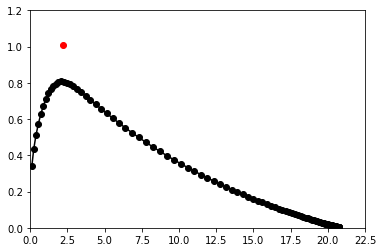

In [9]:
k_0 = k_star / 20
c_0 = 0.34

k_t, c_t = Path(c_0, k_0, params)

plt.plot(k_t, c_t, 'ko-')
plt.plot(k_star, c_star, 'ro')
plt.show()

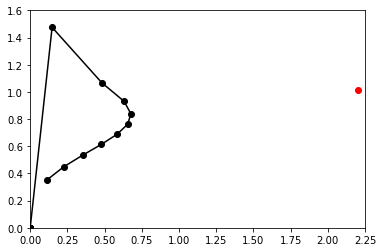

In [10]:
k_0 = k_star / 20
c_0 = 0.35

k_t, c_t = Path(c_0, k_0, params)

plt.plot(k_t, c_t, 'ko-')
plt.plot(k_star, c_star, 'ro')
plt.show()

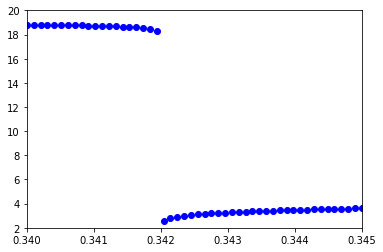

In [11]:
# Confirm that convergence criterion attains minimum in the chosen range

cc_0 = np.linspace(0.34, 0.345)

for c_0 in cc_0:
    plt.plot(c_0, Path_crit(c_0, k_0, params), 'bo')
    
plt.show()

In [12]:
# Find the function minimum, starting from an initial guess
result = minimize(Path_crit, 0.34, args=(k_0, params, 100), method='Nelder-Mead')
print(result)

c_0 = result.x

 final_simplex: (array([[0.34203463],
       [0.34203463]]), array([0.0003119 , 0.00039346]))
           fun: 0.00031189826075628333
       message: 'Optimization terminated successfully.'
          nfev: 100
           nit: 50
        status: 0
       success: True
             x: array([0.34203463])


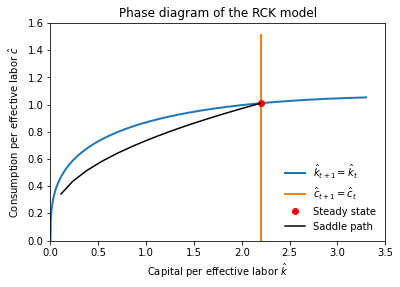

In [13]:
# Phase diagram
k_t, c_t = Path(c_0, k_0, params, 50)

kk = np.linspace(0, 1.5*k_star, 1000)
cc = np.linspace(0, 1.5*c_star, 1000)

plt.plot(kk, Constant_k(kk, params), lw=2, label='$\hat{k}_{t+1}=\hat{k}_{t}$')
plt.plot(kk**0 * k_star, cc, lw=2, label='$\hat{c}_{t+1}=\hat{c}_{t}$')
plt.plot(k_star, c_star, 'ro', label='Steady state')
plt.plot(k_t, c_t, 'k-', label='Saddle path')

plt.title('Phase diagram of the RCK model')
plt.xlabel('Capital per effective labor $\hat{k}$')
plt.ylabel('Consumption per effective labor $\hat{c}$')
plt.legend(loc='lower right')

plt.show()

Let us now verify that our code runs correctly, by solving again the simplified model, for which we have an analytic solution.

In [14]:
# Parameters
params_simple = {'α':0.33, 'δ':1, 'n':0, 'g':0, 'σ':1, 'β':0.96}

# Steady state
print(SteadyState(params_simple))
k_star_simple, c_star_simple = SteadyState(params_simple)

(0.17984701877776357, 0.3878519041318438)


In [15]:
# Find the function minimum, starting from an initial guess
result_simple = minimize(Path_crit, 0.1, 
                         args=(k_star_simple / 20, params_simple, 100), 
                         method='Nelder-Mead')
print(result_simple)

c_0_simple = result_simple.x

 final_simplex: (array([[0.14431984],
       [0.14431984]]), array([0.42762086, 0.42769224]))
           fun: 0.4276208631306686
       message: 'Optimization terminated successfully.'
          nfev: 69
           nit: 34
        status: 0
       success: True
             x: array([0.14431984])


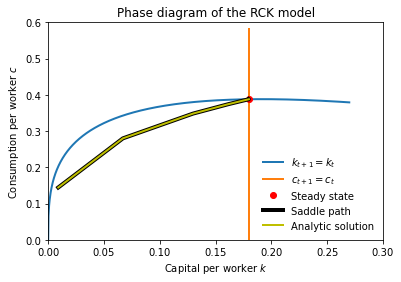

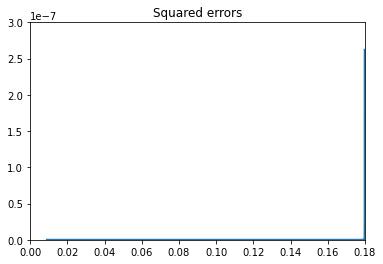

In [16]:
# Generate transition path
k_check, c_check = Path(c_0_simple, k_star_simple / 20, params_simple, 10)

kk = np.linspace(0, 1.5*k_star_simple, 1000)
cc = np.linspace(0, 1.5*c_star_simple, 1000)

plt.plot(kk, Constant_k(kk, params_simple), lw=2, label='$k_{t+1}=k_{t}$')
plt.plot(kk**0 * k_star_simple, cc, lw=2, label='$c_{t+1}=c_{t}$')
plt.plot(k_star_simple, c_star_simple, 'ro', label='Steady state')
plt.plot(k_check, c_check, 'k-', lw=4, label='Saddle path')
plt.plot(k_simple, c_simple, 'y-', lw=2, label='Analytic solution')

plt.title('Phase diagram of the RCK model')
plt.xlabel('Capital per worker $k$')
plt.ylabel('Consumption per worker $c$')
plt.legend(loc='lower right')

plt.show()

plt.plot(k_simple, (c_simple-c_check)**2, lw=2)
plt.title('Squared errors')
plt.show()

It seems that our numerical procedure can recover the analytical solution.

Let us now take a look at the behavior of capital, consumption and saving rate over time in our full model.

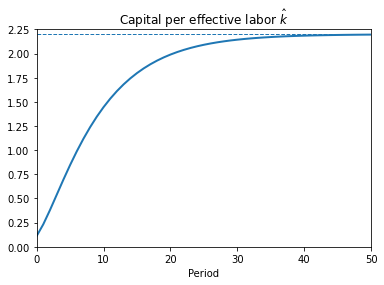

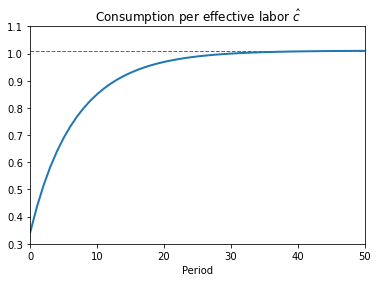

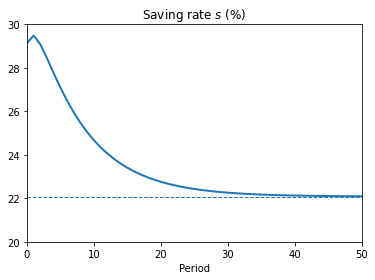

In [17]:
s_t = 1 - c_t/ProductionFunction(k_t, params)
s_star = 1-c_star/ProductionFunction(k_star, params)

plt.plot(k_t, lw=2)
plt.hlines(k_star, 0, 50, lw=1, linestyle='--')
plt.title('Capital per effective labor $\hat{k}$')
plt.xlabel('Period')
plt.show()

plt.plot(c_t, lw=2)
plt.hlines(c_star, 0, 50, lw=1, linestyle='--')
plt.title('Consumption per effective labor $\hat{c}$')
plt.xlabel('Period')
plt.show()

plt.plot(100*s_t, lw=2)
plt.hlines(100*s_star, 0, 50, lw=1, linestyle='--')
plt.title('Saving rate $s$ (%)')
plt.xlabel('Period')
plt.ylim(20, 30)
plt.show()

Usually the RCK model generates decreasing saving rate along the transition path. The condition for when the saving rate is decreasing is summarized by:

\begin{align}
s^{*} < 1/\sigma
\end{align}

while the BGP saving rate is a function of model parameters. The saving rates of countries rarely exceed 40%, and empirical estimates for $\sigma$ usually place it around 2 (although with high uncertainty).

Below I present a set of parameters for which the saving rate is increasing over time.

(1.4144859318431158, 0.937071262069986)

  final_simplex: (array([[0.3656976],
       [0.3656976]]), array([0.00026281, 0.00030694]))
           fun: 0.0002628131940320468
       message: 'Optimization terminated successfully.'
          nfev: 143
           nit: 71
        status: 0
       success: True
             x: array([0.3656976])


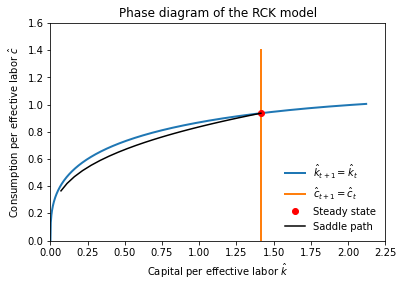

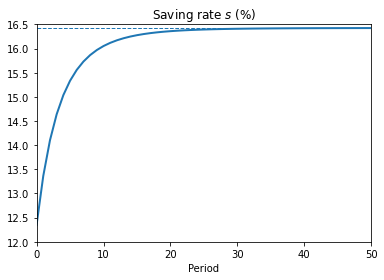

In [18]:
# Parameters
params_dec = {'α':0.33, 'δ':0.1, 'n':0.01, 'g':0.02, 'σ':5, 'β':0.96}

# Steady state
print(SteadyState(params_dec))
k_star_dec, c_star_dec = SteadyState(params_dec)

# Find the function minimum, starting from an initial guess
result_dec = minimize(Path_crit, 0, 
                      args=(k_star_dec / 20, params_dec, 100), 
                      method='Nelder-Mead')
print('\n', result_dec)

# Generate transition path
c_0_dec = result_dec.x
k_dec, c_dec = Path(c_0_dec, k_star_dec / 20, params_dec, 100)

# Check if steady state was reached

kk = np.linspace(0, 1.5*k_star_dec, 1000)
cc = np.linspace(0, 1.5*c_star_dec, 1000)

plt.plot(kk, Constant_k(kk, params_dec), lw=2, label='$\hat{k}_{t+1}=\hat{k}_{t}$')
plt.plot(kk**0 * k_star_dec, cc, lw=2, label='$\hat{c}_{t+1}=\hat{c}_{t}$')
plt.plot(k_star_dec, c_star_dec, 'ro', label='Steady state')
plt.plot(k_dec, c_dec, 'k-', label='Saddle path')

plt.title('Phase diagram of the RCK model')
plt.xlabel('Capital per effective labor $\hat{k}$')
plt.ylabel('Consumption per effective labor $\hat{c}$')
plt.legend(loc='lower right')

plt.show()

# Saving rate
s_dec = 1 - c_dec/ProductionFunction(k_dec, params_dec)
s_star_dec = 1-c_star_dec/ProductionFunction(k_star_dec, params_dec)

plt.plot(100*s_dec[:51], lw=2)
plt.hlines(100*s_star_dec, 0, 50, lw=1, linestyle='--')
plt.title('Saving rate $s$ (%)')
plt.xlabel('Period')
plt.show()

This last exercise also gives us insight on the shape of the transition path as a function of $\sigma$. 

As can be seen below, transition path for higher $\sigma$ consumers runs close to the $\hat{k}_{t+1}=\hat{k}_{t}$ condition.

Also, higher $\sigma$ consumers end up with lower consumption per effective worker in the steady state, provided that $g>0$.

In [19]:
# Parameters
params_low = {'α':0.33, 'δ':0.1, 'n':0.01, 'g':0.02, 'σ':0.2, 'β':0.96}

# Steady state
print(SteadyState(params_low))
k_star_low, c_star_low = SteadyState(params_low)

# Find the function minimum, starting from an initial guess
result_low = minimize(Path_crit, 0, 
                      args=(k_star_dec / 20, params_low, 50), 
                      method='Nelder-Mead')
print('\n', result_low)

# Generate transition path
c_0_low = result_low.x
k_low, c_low = Path(c_0_low, k_star_dec / 20, params_low, 50)

(3.051988845882611, 1.0477792009922147)

  final_simplex: (array([[0.02842781],
       [0.02842781]]), array([0.00061262, 0.00070923]))
           fun: 0.0006126176462043319
       message: 'Optimization terminated successfully.'
          nfev: 116
           nit: 58
        status: 0
       success: True
             x: array([0.02842781])


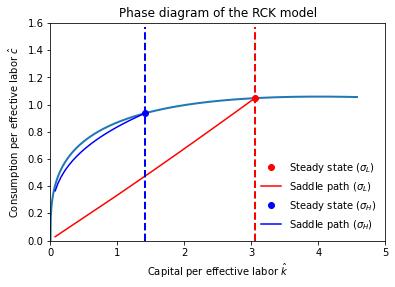

In [20]:
kk = np.linspace(0, 1.5*k_star_low, 1000)
cc = np.linspace(0, 1.5*c_star_low, 1000)

plt.plot(kk, Constant_k(kk, params_low), lw=2)

plt.plot(kk**0 * k_star_low, cc, 'r--', lw=2)
plt.plot(k_star_low, c_star_low, 'ro', label='Steady state ($\sigma_{L}$)')
plt.plot(k_low, c_low, 'r-', label='Saddle path ($\sigma_{L}$)')

plt.plot(kk**0 * k_star_dec, cc, 'b--', lw=2)
plt.plot(k_star_dec, c_star_dec, 'bo', label='Steady state ($\sigma_{H}$)')
plt.plot(k_dec, c_dec, 'b-', label='Saddle path ($\sigma_{H}$)')

plt.title('Phase diagram of the RCK model')
plt.xlabel('Capital per effective labor $\hat{k}$')
plt.ylabel('Consumption per effective labor $\hat{c}$')
plt.legend(loc='lower right')

# plt.xlim(0, 4)

plt.show()

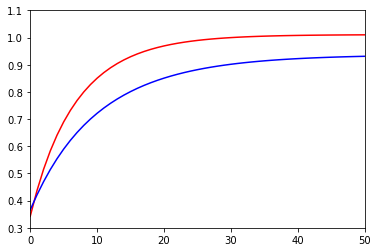

In [21]:
# Compare consumption paths

plt.plot(c_t, 'r')
plt.plot(c_dec[:51], 'b')
plt.show()

In this context, risk aversion can be related to the standard deviation of consumption paths: consumers with high $\sigma$ start with higher and end up with lower consumption that consumers with low $\sigma$.

### Extension: Stone-Geary preferences

The standard RCK model predicts that for the "usual" parameter values saving rates will decline with the level of GDP per worker. This also counterfactually implies that countries with lowest levels of GDP per worker should also have highest saving / investment rates.

To correct for this issue, we may introduce a modification to the utility function that requires that an individual has to consume at least a certain minimum to survive, and only the excess consumption yields utility. This is captured by the Stone-Geary function and can be expressed as:

\begin{align}
u\left(c_{t}\right)=\frac{\left(c_{t}-\bar{c}\right)^{1-\sigma}-1}{1-\sigma}
\end{align}

and the corresponding Euler equation reads:

\begin{align}
c_{t+1}= \left(\beta \frac{1+r_{t+1}}{1+n}\right)^{1/\sigma} \left(c_{t}-\bar{c}\right) + \bar{c}
\end{align}

In economies where $y\approx\bar{c}$ (output per person is close to the survival requirement) households will save very little. Only when output per person becomes sufficiently high, those households will start saving more (even if $\sigma<1/s^{*}$). This generates an "inverse-U" convergence pattern: the least developed countries exhibit relatively low growth rates, while the middle income countries grow the fastest.

In [22]:
def EulerEquation_SG(k, c, params):
    n = params['n']
    g = params['g']
    β = params['β']
    σ = params['σ']
    c_min = params['c_min']
    
    k_next = ResourceConstraint(k, c, params)
    
    if k_next > 0:
        r = InterestRate(k_next, params)
        c_next = (β*(1+r)/(1+n))**(1/σ) * (c-c_min) / (1+g) + c_min
        return c_next
    else:
        return 0

In [23]:
# Forward equations and convergence criterion

def Path_SG(c_0, k_0, params, T=100):
    
    T += 1
    
    k_t = np.zeros(T)
    c_t = np.zeros(T)
    
    k_t[0] = k_0
    c_t[0] = c_0
    
    for t in range(T-1):
        k_t[t+1] = ResourceConstraint(k_t[t], c_t[t], params)
        if k_t[t+1] > 0:
            c_t[t+1] = EulerEquation_SG(k_t[t], c_t[t], params)
        else:
            k_t[t+1] = 0
            c_t[t+1] = 0
            
    return k_t, c_t

def Path_crit_SG(c_0, k_0, params, T=100):
    
    k_t, c_t = Path_SG(c_0, k_0, params, T)
    k_star, c_star = SteadyState(params)
    
    ss_diff = np.sqrt((k_t-k_star)**2 + (c_t-c_star)**2)
    
    return np.min(ss_diff) + ss_diff[-1]

In [24]:
# Parameters for Stone-Geary
params_SG = {'α':0.33, 'δ':0.1, 'n':0.01, 'g':0, 'σ':2, 'β':0.96, 'c_min':0.49}

# Steady state
print(SteadyState(params_SG))
k_star_SG, c_star_SG = SteadyState(params_SG)

# Initial level of capital
k_0_SG = k_star_SG / 20

(3.177882143898165, 1.1149872350333627)


In [25]:
# Find the function minimum, starting from an initial guess
result_SG = minimize(Path_crit_SG, 0.5,
                     args=(k_0_SG, params_SG, 100),
                     method='Nelder-Mead')
print(result_SG)

c_0_SG = result_SG.x

 final_simplex: (array([[0.51355245],
       [0.51355245]]), array([0.00156432, 0.00156923]))
           fun: 0.0015643198165904324
       message: 'Optimization terminated successfully.'
          nfev: 92
           nit: 45
        status: 0
       success: True
             x: array([0.51355245])


In [26]:
k_t_SG, c_t_SG = Path_SG(c_0_SG, k_0_SG, params_SG, 100)

y_t_SG = ProductionFunction(k_t_SG, params_SG)

s_t_SG = 1 - c_t_SG/y_t_SG

g_y_t_SG = 100*(y_t_SG[1:]/y_t_SG[:-1]-1)

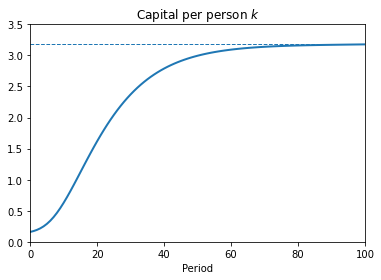

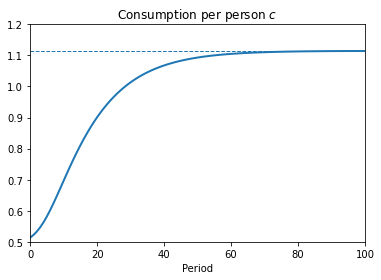

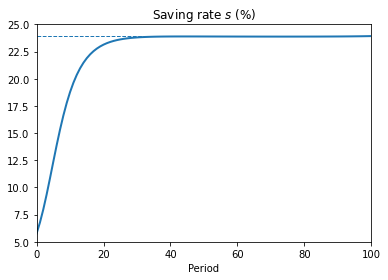

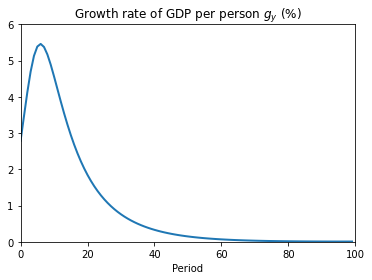

In [27]:
plt.plot(k_t_SG, lw=2)
plt.hlines(k_star_SG, 0, 100, lw=1, linestyle='--')
plt.title('Capital per person $k$')
plt.xlabel('Period')
plt.show()

plt.plot(c_t_SG, lw=2)
plt.hlines(c_star_SG, 0, 100, lw=1, linestyle='--')
plt.title('Consumption per person $c$')
plt.xlabel('Period')
plt.show()

plt.plot(100*s_t_SG, lw=2)
plt.hlines(100*s_t_SG[-1], 0, 100, lw=1, linestyle='--')
plt.title('Saving rate $s$ (%)')
plt.xlabel('Period')
plt.show()

plt.plot(g_y_t_SG, lw=2)
plt.title('Growth rate of GDP per person $g_{y}$ (%)')
plt.xlabel('Period')
plt.show()

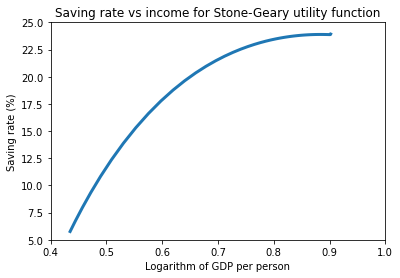

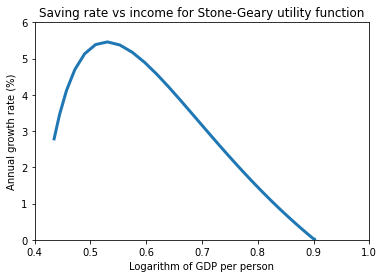

In [28]:
plt.plot(np.log(1+y_t_SG), 100*s_t_SG, lw=3)
plt.title('Saving rate vs income for Stone-Geary utility function')
plt.xlabel('Logarithm of GDP per person')
plt.ylabel('Saving rate (%)')
plt.show()

plt.plot(np.log(1+y_t_SG[:-1]), g_y_t_SG, lw=3)
plt.title('Saving rate vs income for Stone-Geary utility function')
plt.xlabel('Logarithm of GDP per person')
plt.ylabel('Annual growth rate (%)')
plt.show()

# Analysis of Taxes



## Analysis of Taxation in the Long-Run

For simplicity, we will assume $n=g=0$ and $N=A=1$. We will consider two uses for the taxes: lump-sum transfers to households $v$ and useless from the point of view of households government consumption~$g$ (note the notation change!). We assume that in each period the government's budget is balanced.

### Households' problem

The representative "dynasty" solves the following problem:

\begin{align}
\max\quad & U=\sum_{t=0}^{\infty}\beta^{t}\cdot\frac{c_{t}^{1-\sigma}-1}{1-\sigma}\\
\text{subject to}\quad & a_{t+1}=\left(1+(1-\tau^{a})r_{t}\right)a_{t}+\left(1-\tau^{w}\right)w_{t}-\left(1+\tau^{c}_{t}\right)c_{t}-\tau_{t}+v_{t}
\end{align}

Lagrangian:

\begin{align}
\mathcal{L}=\sum_{t=0}^{\infty}\beta^{t}\cdot\frac{c_{t}^{1-\sigma}-1}{1-\sigma}+\sum_{t=0}^{\infty}\beta^{t}\lambda_{t}\left[\left(1+(1-\tau^{a})r_{t}\right)a_{t}+\left(1-\tau^{w}\right)w_{t}-\left(1+\tau^{c}_{t}\right)c_{t}-\tau_{t}+v_{t}-a_{t+1}\right]
\end{align}

First order conditions (FOCs):

\begin{align}
\frac{\partial\mathcal{L}}{\partial c_{t}} & =\beta^{t}c_{t}^{-\sigma}-\beta^{t}\lambda_{t}\left(1+\tau^{c}_{t}\right)=0\\
\frac{\partial\mathcal{L}}{\partial a_{t+1}} & =-\beta^{t}\lambda_{t}+\beta^{t+1}\lambda_{t+1}\left[\left(1+(1-\tau^{a})r_{t+1}\right)\right]=0
\end{align}

Simplify and rewrite:

\begin{align}
\lambda_{t} & =\frac{c_{t}^{-\sigma}}{\left(1+\tau^{c}_{t}\right)}\\
\lambda_{t} & =\beta\lambda_{t+1}\left[\left(1+(1-\tau^{a})r_{t+1}\right)\right]
\end{align}

Join conditions:

\begin{align}
\left(\frac{c_{t+1}}{c_{t}}\right)^{\sigma} =\frac{\left(1+\tau^{c}_{t}\right)}{\left(1+\tau^{c}_{t+1}\right)}\beta\left(1+(1-\tau^{a})r_{t+1}\right)
\end{align}

### Firms' problem

The problem of the firms will be the same for both simplified and general cases. The firms want to hire optimal quantities of labor and capital to maximize their profits:

\begin{align}
\max\quad\Pi_{t}=\left(1-\tau^{f}\right)\left[K_{t}^{\alpha}\left(A_{t}L_{t}\right)^{1-\alpha}-\delta K_{t}-w_{t}L_{t}\right]-r_{t}K_{t}
\end{align}

First order conditions (FOCs):

\begin{align}
\frac{\partial\Pi_{t}}{\partial L_{t}} & =\left(1-\tau^{f}\right)\left[\left(1-\alpha\right)K_{t}^{\alpha}A_{t}^{1-\alpha}L_{t}^{-\alpha}-w_{t}\right]=0\\
\frac{\partial\Pi_{t}}{\partial K_{t}} & =\left(1-\tau^{f}\right)\left[\alpha K_{t}^{\alpha-1}\left(A_{t}L_{t}\right)^{1-\alpha}-\delta\right]-r_{t}=0
\end{align}

Simplify the above expressions:

\begin{align}
w_{t} & =\left(1-\alpha\right)\left(k_{t}\right)^{\alpha}\\
r_{t} & =\left(1-\tau^{f}\right)\left(\alpha k_{t}^{\alpha-1}-\delta\right)
\end{align}

The above equations determine both the wage $w$ and the real interest rate $r$ as functions of capital (per labor).


### Government Sector
The government maintains balanced budget. In per capita terms:
\begin{align}
g_{t}+v_{t} & =\tau^{f}\left(\alpha k_{t}^{\alpha}-\delta k_{t}\right) + \tau^{a}r_{t}a_{t}+\tau^{c}_{t}c_{t} + \tau^{w}w_{t}+\tau_{t}\\
v_{t} & =\tau^{f}\left(\alpha k_{t}^{\alpha}-\delta k_{t}\right) + \tau^{a}r_{t}a_{t}+\tau^{c}_{t}c_{t} + \tau^{w}w_{t}+\tau_{t}-g_{t} 
\end{align}

### General Equilibrium
Market clearing for capital:

\begin{align}
k_{t} = a_{t}
\end{align}

\begin{align}
k_{t+1} & =\left(1+(1-\tau^{a})r_{t}\right)k_{t}+\left(1-\tau^{w}\right)w_{t}-\left(1+\tau^{c}_{t}\right)c_{t}-\tau_{t}+v_{t}\\
k_{t+1} & =\left(1+r_{t}\right)k_{t}+w_{t}-c_{t}-\left(\tau^{a}r_{t}k_{t}+\tau^{w}w_{t}+\tau^{c}_{t}c_{t}+\tau_{t}-v_{t}\right)
\end{align}

Plug expression for $w_{t}$ and $r_{t}$ from firm's problem and use government sector equation to reach:
\begin{align}
k_{t+1} = k_{t}^{\alpha}+\left(1 -\delta \right) k_{t}-c_{t}-g_{t}
\end{align}

### Steady-state
Assume constant tax rates and use expression for $r_{t+1}$ from firm's problem in the Euler equation to rexpress the Euler equation at the steady-state:

\begin{align}
1 & =\beta\left(1+(1-\tau^{a})\left(1-\tau^{f}\right)\left(\alpha k^{\alpha-1}-\delta\right)\right)\\
1 & =(1-\tau^{a})\left(1-\tau^{f}\right)\left(\alpha k^{\alpha-1}-\delta\right)\\
\frac{\rho}{(1-\tau^{a})\left(1-\tau^{f}\right)} & =\alpha k^{\alpha-1}-\delta\\
\alpha k^{\alpha-1} & = \frac{\rho}{(1-\tau^{a})\left(1-\tau^{f}\right)} + \delta\\
k^{*} & = \left(\frac{\alpha}{\frac{\rho}{(1-\tau^{a})\left(1-\tau^{f}\right)}+\delta}\right)^{\frac{1}{1-\alpha}}\\
c^{*} & = \left(k^{*}\right)^{\alpha}-\delta k^{*} - g
\end{align}

The capital gains tax and the tax on firms’ accounting profits affect the incentives to accumulate and hold capital
and their presence lowers the level of capital per worker in the steady state. However, the other taxes (lump-sum,
consumption and labor income) do not appear in our steady state conditions.

There is also a distinction in whether the government uses the tax revenue to arrange transfers to households $v$
or to finance public consumption $g$. For a given level of capital per worker public consumption necessarily crowds
out private consumption, and can have differing welfare effects depending on households’ preferences toward public
vs. private consumption.

### First policy experiment: Two identical country except taxes, and government spending are zero in first country and capital tax and government spending are positive in the second country.

The two countries share the same values in the following parameters:
\begin{align}
\delta, \alpha, \sigma, \beta
\end{align}

The following tax rates and fiscal spending components are zero in the two countries:
\begin{align}
\tau^{c}, \tau^{f}, \tau^{w}, v
\end{align}

The capital tax rate and government spending are zero in the first but positive in the second country:
\begin{align}
\tau^{a}_{1}=g_{1}=0\\
\tau^{a}_{2}>0,g_{2}>0
\end{align}

What is the impact of second country's fiscal policy on the levels of capital and consumption per effective labor along the balanced growth path relative to the first country? Explain.

Note: We assume that government spending is constant fraction of output; hence, $g_1=G_1/Y_1$ and $g_2=G_2/Y_2$. Hence, lump-sum tax, $\tau$, adjusts to balance the government budget.

In [29]:
# Define necessary functions

def SteadyState_Fiscal(params,fiscal):
    α = params['α']
    δ = params['δ']
    β = params['β']
    σ = params['σ']
    ρ = 1/β-1
    
    g = fiscal['g']
    tau_a = fiscal['tau_a']
    tau_f = fiscal['tau_f']
    
    k_star = (α/((ρ/(1-tau_a)*(1-tau_f))+δ))**(1/(1-α))
    g_star = g*k_star**α
    c_star = k_star**(α) - (δ)*k_star - g_star
    
    return k_star, c_star

def ResourceConstraint_Fiscal(k, c, params, fiscal):
    α = params['α']
    δ = params['δ']
    g = fiscal['g']
    
    return k**α+(1-δ)*k-c-g*k**α

def EulerEquation_Fiscal(k, c, params, fiscal):
    α = params['α']
    β = params['β']
    σ = params['σ']
    δ = params['δ']
    
    g = fiscal['g']
    tau_f = fiscal['tau_f']
    tau_a = fiscal['tau_a']

    k_next = ResourceConstraint_Fiscal(k, c, params, fiscal)
    
    if k_next > 0:
        r_next= (1-tau_f)*(α*k_next**(α-1)-δ)
        c_next = (β*(1+(1-tau_a)*r_next))**(1/σ) * c 
        return c_next
    else:
        return 0
    
def Constant_k_Fiscal(k, params, fiscal):
    δ = params['δ']
    α = params['α']

    g = fiscal['g']

    
    return (1-g)*k**α - δ*k

In [30]:
# Common Parameters
params = {'α':0.33, 'δ':0.1, 'σ':2, 'β':0.96}
# Fiscal Parameters for 1st country: no taxes and government spending
fiscal_1 = {'g':0, 'tau_a':0, 'tau_f':0}
# Fiscal Parameters for 2nd country: only capital taxes (tau_a=0.2) are positive and government spending is positive 
# which is constant share of output G/Y=g_y=0.2
fiscal_2 = {'g':0.2, 'tau_a':0.2, 'tau_f':0}

# Steady state
print(SteadyState_Fiscal(params,fiscal_1))
k_star_1, c_star_1 = SteadyState_Fiscal(params,fiscal_1)

print(SteadyState_Fiscal(params,fiscal_2))
k_star_2, c_star_2 = SteadyState_Fiscal(params,fiscal_2)

(3.5328789171564186, 1.1633520474676697)
(3.177882143898167, 0.8538552022999121)


In [31]:
# Forward equations and convergence criterion

def Path_Fiscal(c_0, k_0, params, fiscal, T=100):
    
    T += 1
    
    k_t = np.zeros(T)
    c_t = np.zeros(T)
    
    k_t[0] = k_0
    c_t[0] = c_0
    
    for t in range(T-1):
        k_t[t+1] = ResourceConstraint_Fiscal(k_t[t], c_t[t], params, fiscal)
        if k_t[t+1] > 0:
            c_t[t+1] = EulerEquation_Fiscal(k_t[t], c_t[t], params, fiscal)
        else:
            k_t[t+1] = 0
            c_t[t+1] = 0
            
    return k_t, c_t

def Path_crit_Fiscal(c_0, k_0, params, fiscal, T=100):
    
    k_t, c_t = Path_Fiscal(c_0, k_0, params, fiscal, T)
    k_star, c_star = SteadyState_Fiscal(params, fiscal)
    
    ss_diff = np.sqrt((k_t-k_star)**2 + (c_t-c_star)**2)
    
    return np.min(ss_diff) + ss_diff[-1]

In [32]:
# Find the function minimum, starting from an initial guess

# First country

k_0_1=k_star_1/20

result= minimize(Path_crit_Fiscal, 0.34, args=(k_0_1, params, fiscal_1, 100), method='Nelder-Mead')
print(result)

c_0_1 = result.x

# Second country
k_0_2=k_star_2/20

result= minimize(Path_crit_Fiscal, 0.34, args=(k_0_2, params, fiscal_2, 100), method='Nelder-Mead')
print(result)

c_0_2 = result.x

 final_simplex: (array([[0.38739982],
       [0.38739982]]), array([0.02632353, 0.0263267 ]))
           fun: 0.026323527867729863
       message: 'Optimization terminated successfully.'
          nfev: 74
           nit: 37
        status: 0
       success: True
             x: array([0.38739982])
 final_simplex: (array([[0.29106841],
       [0.29106841]]), array([0.00028485, 0.00036249]))
           fun: 0.00028484864793079976
       message: 'Optimization terminated successfully.'
          nfev: 78
           nit: 39
        status: 0
       success: True
             x: array([0.29106841])


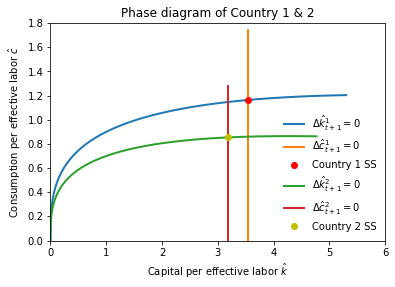

In [33]:
# Phase diagram
k_t_1, c_t_1 = Path_Fiscal(c_0_1, k_0_1, params, fiscal_1, 50)
k_t_2, c_t_2 = Path_Fiscal(c_0_2, k_0_2, params, fiscal_2, 50)

kk_1 = np.linspace(0, 1.5*k_star_1, 1000)
cc_1 = np.linspace(0, 1.5*c_star_1, 1000)
kk_2 = np.linspace(0, 1.5*k_star_2, 1000)
cc_2 = np.linspace(0, 1.5*c_star_2, 1000)

plt.plot(kk_1, Constant_k_Fiscal(kk_1, params, fiscal_1), lw=2, label='$\Delta \hat{k}^{1}_{t+1}=0$')
plt.plot(kk_1**0 * k_star_1, cc_1, lw=2, label='$\Delta \hat{c}^{1}_{t+1}=0$')
plt.plot(k_star_1, c_star_1, 'ro', label='Country 1 SS')
#plt.plot(k_t_1, c_t_1, 'k-', label='Saddle path')
plt.plot(kk_2, Constant_k_Fiscal(kk_2, params, fiscal_2), lw=2, label='$\Delta \hat{k}^{2}_{t+1}=0$')
plt.plot(kk_2**0 * k_star_2, cc_2, lw=2, label='$\Delta \hat{c}^{2}_{t+1}=0$')
plt.plot(k_star_2, c_star_2, 'yo', label='Country 2 SS')
#plt.plot(k_t_2, c_t_2, 'k-', label='Saddle path')

plt.title('Phase diagram of Country 1 & 2')
plt.xlabel('Capital per effective labor $\hat{k}$')
plt.ylabel('Consumption per effective labor $\hat{c}$')
plt.legend(loc='lower right')

plt.show()

We observe that steady-state levels of capital and consumption per effective labor in Country 2 is lower compared to Country 1. Remember the equation for capital at steady-state:

\begin{align}
k^{*} & = \left(\frac{\alpha}{\frac{\rho}{(1-\tau^{a})\left(1-\tau^{f}\right)}+\delta}\right)^{\frac{1}{1-\alpha}}\\
\end{align}

The increase in capital tax, $\tau^{a}$, decreases the steady-state level of capital. In that case $\Delta \hat{c}^{2}_{t+1}=0$ line for country 2 (red vertical line) in the above figure moves to the left of the $\Delta \hat{c}^{1}_{t+1}=0$ line (orange vertical line) for Country 1. 

Remember the equation for consumption at steady-state:

\begin{align}
c^{*} & = \left(k^{*}\right)^{\alpha}-\delta k^{*} - g
\end{align}

The increase in government spending, $g$, decreases the steady-state level of consumption. In that case $\Delta \hat{k}^{2}_{t+1}=0$ line for country 2 (green concave line) in the above figure moves to the down of the $\Delta \hat{k}^{1}_{t+1}=0$ line (blue concave line) for Country 1. 

In the end, the difference in orange and red vertical lines is due to the higher capital tax which decreases the steady-state level of capital and also consumption. Since government spending is positive, there is additional negative effect on the consumption at steady-state which can be observed through the movement from blue to green concave lines.

# Homework
Assume that there are two countries that share the following same values in the following parameters:
\begin{align}
\delta=0.1, \alpha=0.33, \sigma=2, \beta=0.96
\end{align}

Conduct the following fiscal policy experiments, derive steady-state level of capital and consumption per effective labor and display them in phase diagram:


### Question 1

The following tax rates and government spending are zero in the two countries:
\begin{align}
\tau, \tau^{c}, \tau^{f}, \tau^{w}, g
\end{align}

The capital tax rate and government transfers are zero in the first but positive in the second country:
\begin{align}
\tau^{a}_{1}=v_{1}=0\\
\tau^{a}_{2}=0.2,v_{2}>0
\end{align}

What is the impact of second country's fiscal policy on the levels of capital and consumption per effective labor along the balanced growth path relative to the first country? Explain.

In [34]:
# Your code and explanation goes here

### Question 2

The following tax rates and government transfers are zero in the two countries:
\begin{align}
\tau, \tau^{c}, \tau^{a}, \tau^{w}, v
\end{align}

The firm tax rate and government spending (fraction of output) are zero in the first but positive in the second country:
\begin{align}
\tau^{f}_{1}=g_{1}=G_{1}/Y_{1}=0\\
\tau^{f}_{2}=0.2,g_{2}=G_{2}/Y_{2}=0.2
\end{align}

What is the impact of second country's fiscal policy on the levels of capital and consumption per effective labor along the balanced growth path relative to the first country? Explain.

In [35]:
# Your code and explanation goes here

### Question 3

The following tax rates and government transfers are zero in the two countries:
\begin{align}
\tau, \tau^{a}, \tau^{f}, \tau^{w}, v
\end{align}

The consumption tax rate and government spending (fraction of output) are zero in the first but positive in the second country:
\begin{align}
\tau^{c}_{1}=g_{1}=G_{1}/Y_{1}=0\\
\tau^{c}_{2}=0.2,g_{2}=G_{2}/Y_{2}=0.2
\end{align}

What is the impact of second country's fiscal policy on the levels of capital and consumption per effective labor along the balanced growth path relative to the first country? Explain.

In [36]:
# Your code and explanation goes here

## Optional: Effects of a pre-announced VAT tax hike

In [37]:
# Calibration follows Ljungqvist and Sargent (2012), p. 395

α = 0.33
δ = 0.2
β = 0.95
g = 0.2
σ = 2    # LS call it γ

In [38]:
# Define production function, MPK and steady state conditions

def f(k):
    return k**α

def df_dk(k):
    return α * k**(α-1)

def RCK_ss(variables, τ_c=0):
    
    (k, c) = variables
    
    y = f(k)
    r = df_dk(k) - δ
    
    EE = β*(1+r) - 1                 # Euler equation
    RC = f(k) + (1-δ)*k - g - c - k  # Resource constraint
    
    return [EE, RC]

In [39]:
# Find old and new steady states

τ_c_0 = 0
τ_c_1 = 0.2

results = opt.fsolve(RCK_ss, (1.5, 0.8), args=(τ_c_0))
print('Initial steady state \t=', results)
k_ss_0 = results[0]
c_ss_0 = results[1]

results = opt.fsolve(RCK_ss, (1.5, 0.8), args=(τ_c_1))
print('Final steady state \t=', results)
k_ss_1 = results[0]
c_ss_1 = results[1]

Initial steady state 	= [1.48995649 0.64264525]
Final steady state 	= [1.48995649 0.64264525]


Remember Euler Equation:

\begin{align}
\left(\frac{c_{t+1}}{c_{t}}\right)^{\sigma} =\frac{\left(1+\tau^{c}_{t}\right)}{\left(1+\tau^{c}_{t+1}\right)}\beta\left(1+(1-\tau^{a})r_{t+1}\right)
\end{align}

In [54]:
# Dynamic equations

def Resource_Constraint(k, c, τ_c):
    
    k_n = f(k) + (1-δ)*k - g - c
    
    return k_n

def Interest_Rate(k):
    return df_dk(k) - δ

def Euler_Equation(k, c, τ_c, τ_c_n):
    
    k_n = Resource_Constraint(k, c, τ_c)
    
    if k_n > 0:
        r_n = Interest_Rate(k_n)
        c_n = ( (1+τ_c)/(1+τ_c_n) * β * (1+r_n) )**(1/σ) * c
    else:
        c_n = 0
        
    return c_n

In [56]:
# Forward equations and convergence criterion

def Path(c_0, k_0, Tτ=20, T=50):
    
    T += 1
    
    k_t = np.zeros(T)
    c_t = np.zeros(T)
    τ_c_t = np.zeros(T)
    
    τ_c_t[:Tτ] = τ_c_0
    τ_c_t[Tτ:] = τ_c_1
    
    k_t[0] = k_0
    c_t[0] = c_0
    
    for t in range(T-1):
        k_t[t+1] = Resource_Constraint(k_t[t], c_t[t], τ_c_t[t])
        if k_t[t+1] > 0:
            c_t[t+1] = Euler_Equation(k_t[t], c_t[t], τ_c_t[t], τ_c_t[t+1])
        else:
            k_t[t+1] = 0
            c_t[t+1] = 0
            
    return k_t, c_t

def Path_crit(c_0, k_0, Tτ=20, T=50):
    
    k_t, c_t = Path(c_0, k_0, Tτ, T)
    
    ss_diff = np.sqrt((k_t-k_ss_1)**2 + (c_t-c_ss_1)**2)
    
    return np.min(ss_diff) + ss_diff[-1]

In [42]:
# Find the function minimum, starting from an initial guess
result = opt.minimize(Path_crit, c_ss_0, args=(k_ss_0), method='Powell') # 'Nelder-Mead'
print(result)

c_0 = result.x

   direc: array([[6.33639324e-06]])
     fun: 0.0009482628257852447
 message: 'Optimization terminated successfully.'
    nfev: 88
     nit: 3
  status: 0
 success: True
       x: array([0.64343524])


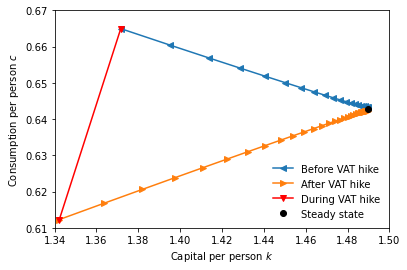

In [43]:
# Plot the phase diagram

k_t, c_t = Path(c_0, k_ss_0)

plt.plot(k_t[:20], c_t[:20], '<-', label='Before VAT hike')
plt.plot(k_t[20:], c_t[20:], '>-', label='After VAT hike')
plt.plot(k_t[19:21], c_t[19:21], 'rv-', label='During VAT hike')
plt.plot(k_ss_1, c_ss_1, 'ko', label='Steady state')
plt.legend(frameon=False)
plt.xlabel('Capital per person $k$')
plt.ylabel('Consumption per person $c$')
plt.show()

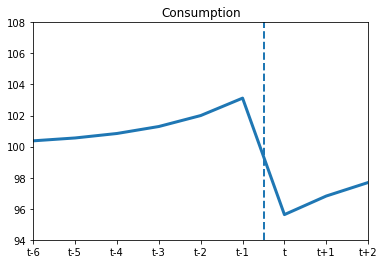

In [44]:
# Convert to montly frequency and display as time series

c_t_m = np.mean(np.array(c_t[:-1]).reshape(-1, 2), axis=1)

# plt.subplots(figsize=(20, 15))

plt.plot(100*c_t_m/c_ss_0, lw=3)
plt.vlines(9.5, 94, 108, lw=2, linestyle='dashed')
plt.ylim(94, 108)
plt.xlim(4, 12)
plt.xticks(np.linspace(4, 12, 9), ['t-6', 't-5', 't-4', 't-3', 't-2', 't-1', 't', 't+1', 't+2'])
plt.title('Consumption')
plt.show()

Compare the above outcome to the real-world behavior of consumption in Germany and Japan around the VAT tax hikes

![Effects of VAT tax hikes](img/consumption_vat_hikes.jpg)

Source: [Danninger (2014) What Japan’s economy needs now](https://www.weforum.org/agenda/2014/08/japan-consumption-tax-structural-reform-abenomics/)

### Optional: Consumption vs labor tax when households choose labor input

In [45]:
# Parameters

A = 1
α = 1/3
δ = 0.1
ρ = 1/30
β = 1/(1+ρ)
print(β)

φ = 1.7777777777

0.9677419354838709


In [46]:
# Functions that are not affected by taxes nor the utility function

def k_h(A, α, δ, ρ):
    return (α*A/(δ+ρ))**(1/(1-α))

def y_h(A, α, δ, ρ):
    return k_h(A, α, δ, ρ)**α

def w(A, α, δ, ρ):
    return (1-α)*y_h(A, α, δ, ρ)

def c_h(A, α, δ, ρ):
    return y_h(A, α, δ, ρ) - δ*k_h(A, α, δ, ρ)

In [47]:
# Functions that are affected by taxes and utility function

def h(A, α, δ, ρ, φ, τ_w=0, τ_c=0):
    try:
        return 1/( 1 + φ * (1+τ_c)/(1-τ_w)/w(A, α, δ, ρ) * c_h(A, α, δ, ρ) )
    except:
        return 0
    
h = np.vectorize(h)

In [48]:
h(A, α, δ, ρ, φ)

array(0.33333333)

In [49]:
ττ = np.linspace(0, 1, 1+1000)

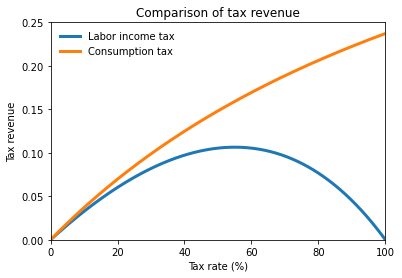

In [50]:
plt.plot(ττ*100, ττ*w(A, α, δ, ρ)*h(A, α, δ, ρ, φ, ττ, 0), lw=3, label='Labor income tax')
plt.plot(ττ*100, ττ*c_h(A, α, δ, ρ)*h(A, α, δ, ρ, φ, 0, ττ), lw=3, label='Consumption tax')

plt.title('Comparison of tax revenue')
plt.xlabel('Tax rate (%)')
plt.ylabel('Tax revenue')
plt.legend(frameon=False)

plt.show()

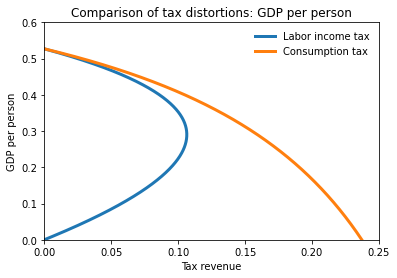

In [51]:
plt.plot(ττ*w(A, α, δ, ρ)*h(A, α, δ, ρ, φ, ττ, 0), 
         y_h(A, α, δ, ρ)*h(A, α, δ, ρ, φ, ττ, 0), lw=3, label='Labor income tax')

plt.plot(ττ*c_h(A, α, δ, ρ)*h(A, α, δ, ρ, φ, 0, ττ), 
         y_h(A, α, δ, ρ)*h(A, α, δ, ρ, φ, ττ, 0), lw=3, label='Consumption tax')

plt.title('Comparison of tax distortions: GDP per person')
plt.xlabel('Tax revenue')
plt.ylabel('GDP per person')
plt.legend(frameon=False)

plt.show()

Can the model explain the differences between the average hours worked in the USA vs Germany & France based on the differences in the average labor income tax rate?

In [52]:
# Data

USA_h = 1790 / 8766
USA_GDP_ph = 59
USA_GDP_pc = 102500
USA_τ_w = 0.255       # Average labor income tax rate in the US

FR_DE_h = 1465 / 8766
FR_DE_GDP_ph = 56
FR_DE_GDP_pc = 82200
FR_DE_τ_w = 0.4375    # Average labor income tax rate in France & Germany

In [53]:
# Model outcomes

USA_h_model = h(1, α, δ, ρ, φ, USA_τ_w, 0)
FR_DE_h_model = h(FR_DE_GDP_ph/USA_GDP_ph, α, δ, ρ, φ, FR_DE_τ_w, 0)

print('Ratio of hours worked: USA vs FR & DE')
print('Model \t', USA_h_model/FR_DE_h_model)
print('Data \t', USA_h/FR_DE_h)

USA_y_model = h(1, α, δ, ρ, φ, USA_τ_w, 0)*y_h(1, α, δ, ρ)
FR_DE_y_model = h(FR_DE_GDP_ph/USA_GDP_ph, α, δ, ρ, φ, FR_DE_τ_w, 0)*y_h(FR_DE_GDP_ph/USA_GDP_ph, α, δ, ρ)

print('\nRatio of GDP per person: USA vs FR & DE')
print('Model \t', USA_y_model/FR_DE_y_model)
print('Data \t', USA_GDP_pc/FR_DE_GDP_pc)

Ratio of hours worked: USA vs FR & DE
Model 	 1.2527451040896995
Data 	 1.2218430034129693

Ratio of GDP per person: USA vs FR & DE
Model 	 1.2858630193474705
Data 	 1.2469586374695865
